In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple de données
models = ['E5 - Small', 'E5 - Large', 'BM25']

e5_small_results = np.array(
    [99.7,99.8,99.6],
)

bm25_results = np.array(
    [80,80.7,83.1],
)

e5_large_results = np.array(
    [99.9,99.9,99.8],
)



e5_small_mean = e5_small_results.mean()
bm25_mean = bm25_results.mean()
e5_small_std = e5_small_results.std()
bm25_std = bm25_results.std()
e5_large_mean = e5_large_results.mean()
e5_large_std = e5_large_results.std()

means = [e5_small_mean, e5_large_mean, bm25_mean]
stds = [e5_small_std, e5_large_std, bm25_std]

print(means)
print(stds)

[99.7, 99.86666666666667, 81.26666666666667]
[0.08164965809277376, 0.047140452079107185, 1.327487183449322]


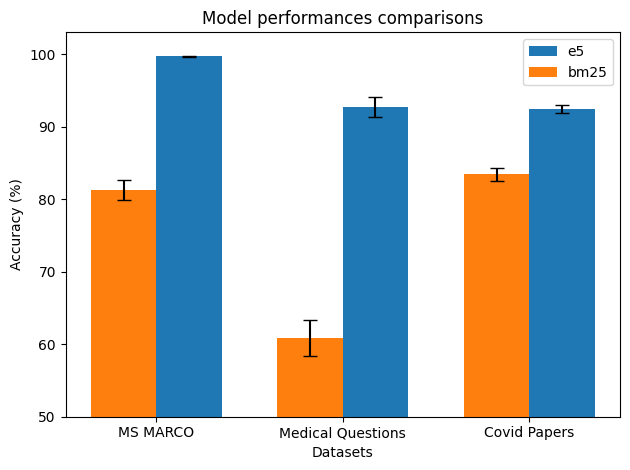

In [21]:

# Exemple de données
datasets = ['MS MARCO', 'Medical Questions', 'Covid Papers']

e5_results = np.array([
    [99.7,99.8,99.6],
    [93.9,90.8,93.5],
    [91.6,93.0,92.6]
])

bm25_results = np.array([
    [80,80.7,83.1],
    [64.3,58.6,59.6],
    [82.2,83.5,84.5]
])



e5_means = e5_results.mean(axis=1)
bm25_means = bm25_results.mean(axis=1)
e5_std = e5_results.std(axis=1)
bm25_std = bm25_results.std(axis=1)

x = np.arange(len(datasets))  # positions des groupes de barres
width = 0.35  # largeur des barres

fig, ax = plt.subplots()

# Barres pour le modèle 1
bars1 = ax.bar(x + width/2, e5_means, width, yerr=e5_std, label='e5', capsize=5)

# Barres pour le modèle 2
bars2 = ax.bar(x - width/2, bm25_means, width, yerr=bm25_std, label='bm25', capsize=5)

# Ajout des étiquettes, du titre et de la légende
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model performances comparisons')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()
ax.set_ylim(50,103)


# Affichage de la figure
plt.tight_layout()
plt.show()


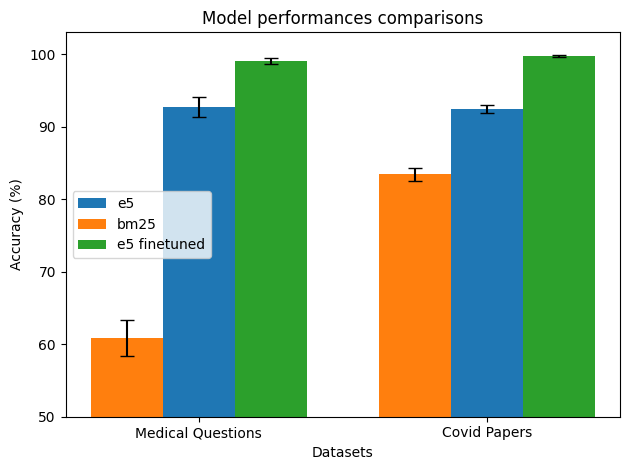

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données
datasets = ['Medical Questions', 'Covid Papers']

# Données des performances des modèles (on garde seulement les deux derniers datasets)
e5_results = np.array([
    [93.9,90.8,93.5],
    [91.6,93.0,92.6]
])

bm25_results = np.array([
    [64.3,58.6,59.6],
    [82.2,83.5,84.5]
])

# Ajout d'un troisième modèle (exemple de données fictives)
model3_results = np.array([
    [98.4,99.4,99.3],
    [99.9,99.6,99.8]
])

# Calcul des moyennes et des écarts-types
e5_means = e5_results.mean(axis=1)
bm25_means = bm25_results.mean(axis=1)
model3_means = model3_results.mean(axis=1)

e5_std = e5_results.std(axis=1)
bm25_std = bm25_results.std(axis=1)
model3_std = model3_results.std(axis=1)

x = np.arange(len(datasets))  # positions des groupes de barres
width = 0.25  # largeur des barres, ajustée pour trois modèles

fig, ax = plt.subplots()

# Barres pour le modèle 2 (e5)
bars2 = ax.bar(x, e5_means, width, yerr=e5_std, label='e5', capsize=5)

# Barres pour le modèle 1 (bm25)
bars1 = ax.bar(x - width, bm25_means, width, yerr=bm25_std, label='bm25', capsize=5)

# Barres pour le modèle 3 (exemple)
bars3 = ax.bar(x + width, model3_means, width, yerr=model3_std, label='e5 finetuned', capsize=5)

# Ajout des étiquettes, du titre et de la légende
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model performances comparisons')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()
ax.set_ylim(50,103)

# Affichage de la figure
plt.tight_layout()




plt.show()


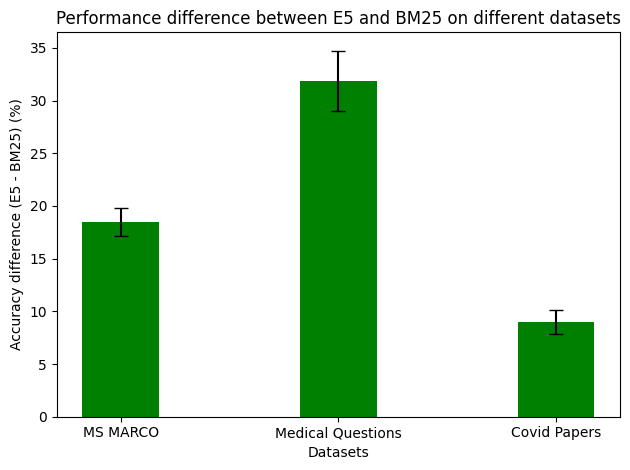

In [22]:
# Calcul des différences de performances et des incertitudes
differences = np.array(e5_means) - np.array(bm25_means)
std_diff = np.sqrt(np.array(e5_std)**2 + np.array(bm25_std)**2)

x = np.arange(len(datasets))  # positions des groupes de barres
width = 0.35  # largeur des barres

fig, ax = plt.subplots()

# Couleurs pour les barres
colors = ['green' if diff > 0 else 'red' for diff in differences]

# Barres pour les différences de performance
bars = ax.bar(x, differences, width, yerr=std_diff, capsize=5, color=colors)

# Ajout des étiquettes, du titre et des couleurs
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy difference (E5 - BM25) (%)')
ax.set_title('Performance difference between E5 and BM25 on different datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)

# Affichage de la figure
plt.tight_layout()

plt.show()

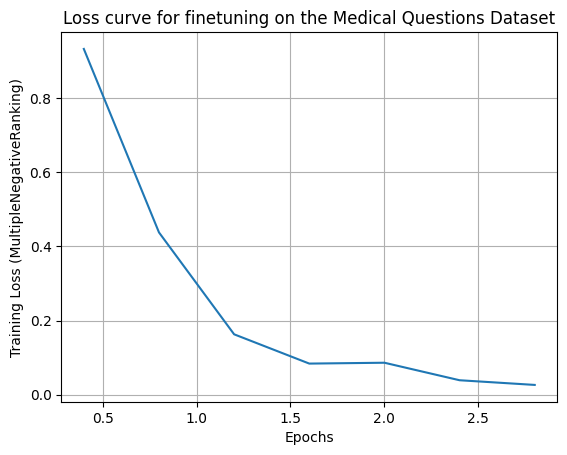

In [6]:
epochs = np.array([0.4,0.8,1.2,1.6,2.0,2.4,2.8])
loss = np.array([0.932 ,0.4375,0.1629,0.084,0.0863,0.0391,0.0265])

fig,ax = plt.subplots()
ax.plot(epochs,loss)

ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss (MultipleNegativeRanking)')
ax.set_title('Loss curve for finetuning on the Medical Questions Dataset')
ax.grid()